In [1]:
from HLA_stats_plots import *
%matplotlib inline

In [2]:
IMGT_HLA_STATS_URL = 'https://www.ebi.ac.uk/ipd/imgt/hla/stats.html'
HLA_ALLELE_HISTORY = 'https://raw.githubusercontent.com/ANHIG/IMGTHLA/Latest/Allelelist_history.txt'

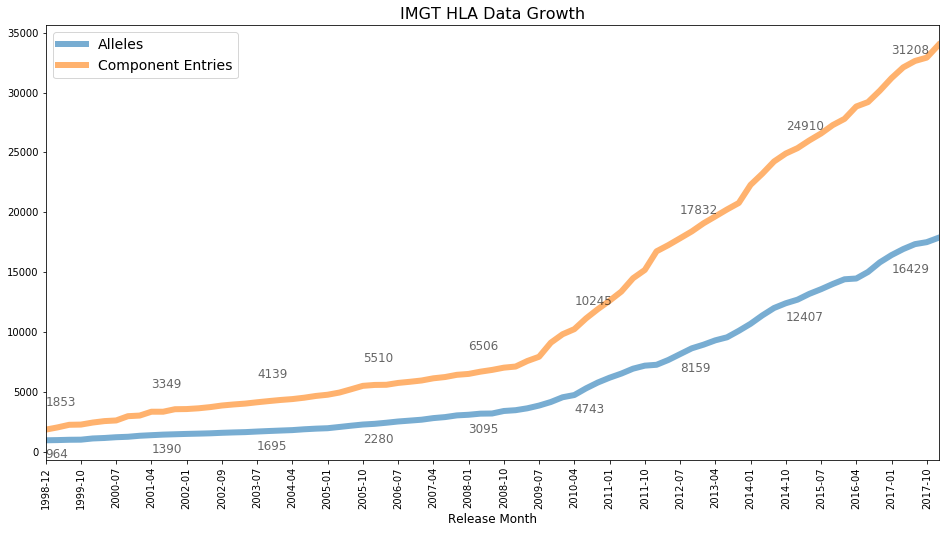

In [3]:
dg = DataGrowthPlot(IMGT_HLA_STATS_URL)
version_map = dg.release_dates()
dg.plot()

In [4]:
lg = LocusStackingPlot(HLA_ALLELE_HISTORY, version_map)

Reading directly from url may take a while...


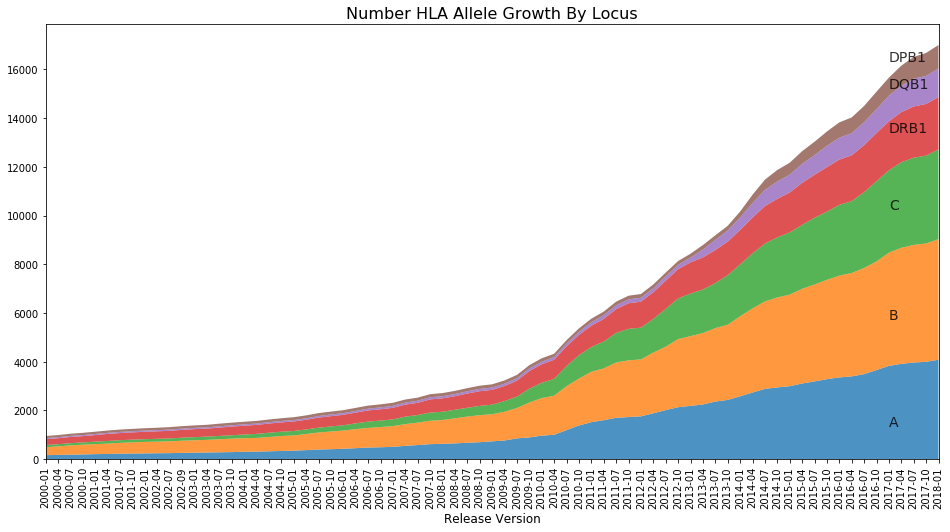

In [5]:
lg.plot()